#### Example Persistence Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import CubicalPersistence
from gudhi.persistence_graphical_tools import plot_persistence_diagram
from gtda.diagrams import PersistenceImage

In [2]:
# produce persistence surfaces as a weighted sum of all distributions

# define bump weight function 
def bump(b_p_data, params):
    # Persistence length
    radius = b_p_data[1]

    # Parameters controlling range of non-zero, non-trivial weightings
    maxradius = params[0]
    minradius = params[1]

    # Parameters controlling bump function near maxradius and minradius
    M = [params[2], params[3]]

    # Parameter to control error approximation
    resolution = params[4]

    if radius > maxradius:
        return 1
    elif radius < minradius:
        return 0
    
    # Compute bump function weights
    x = np.linspace(minradius, maxradius, resolution)
    g = np.zeros(resolution)

    for i in range(resolution):
        g[i] = f(x[i] - minradius, M[0]) * f(maxradius - x[i], M[1])

    return h(x, g, radius)

# helper functions
def f(x, M):
    if x > 0:
        return np.exp(-M / x)
    else:
        return 0

def h(x, g, radius):
    idx = (np.abs(x - radius)).argmin()
    if idx < 1:
        return 0
    else:
        return np.trapz(g[:idx+1], x[:idx+1]) / np.trapz(g, x)


# define linear weight function
def linear_ramp(b_p_data, params):
    min_radius = params[0]
    max_radius = params[1]

    x = b_p_data[1]

    if x <= min_radius:
        return 0
    elif x >= max_radius:
        return 1
    else:
        return (x - min_radius) / (max_radius - min_radius)
    
# Wrapper function to pass params to linear_ramp
def linear_ramp_wrapper(params):
    def wrapped_function(b_p_data):
        return linear_ramp(b_p_data, params)
    return wrapped_function

In [3]:
# define functions to make persistence images

def make_PIs(HKs, res, sig, weight_func=None, params=None):
    cp = CubicalPersistence(homology_dimensions=[1], coeff=2, periodic_dimensions=None)

    # Compute persistence diagrams
    persistence_diagrams = cp.fit_transform(HKs)

    # Initialize PersistenceImage with the given parameters
    pi = PersistenceImage(sigma=sig, n_bins=res, weight_function=weight_func)

    # Transform the persistence diagrams into persistence images
    PIs = pi.fit_transform(persistence_diagrams)

    return PIs

# Define functions to make persistence vectors
def make_PVs(HKs, res, sig, weight_func=None, params=None):
    cp = CubicalPersistence(homology_dimensions=[1], coeff=2, periodic_dimensions=None)

    # Compute persistence diagrams
    persistence_diagrams = cp.fit_transform(HKs)

    # Initialize PersistenceImage with the given parameters
    pi = PersistenceImage(sigma=sig, n_bins=res, weight_function=weight_func)

    # Transform the persistence diagrams into persistence images
    persistence_images = pi.fit_transform(persistence_diagrams)

    # Compute the persistence vectors (flattened persistence images)
    PVs = persistence_images.reshape(persistence_images.shape[0], -1)

    return PVs

In [ ]:
#HKs = 

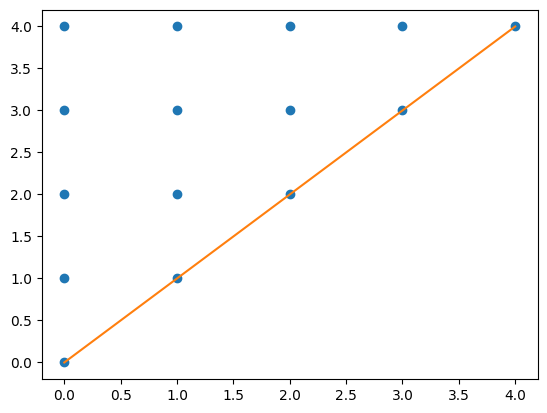

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]


TypeError: Invalid shape (1, 300, 300) for image data

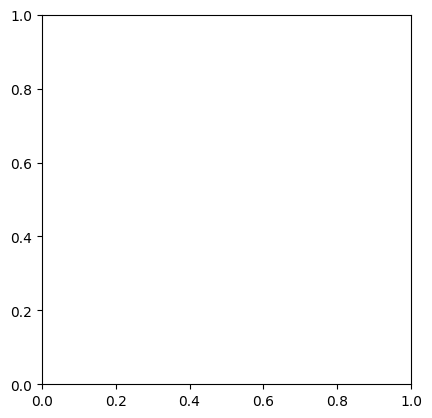

In [7]:
# Example 0: Generate persistence images from a "grid-like" persistence diagram with a linear weighting function
HKs = [np.array([[0,0],[0,1],[0,2],[0,3],[0,4],
                 [1,1],[1,2],[1,3],[1,4],
                 [2,2],[2,3],[2,4],
                 [3,3],[3,4],
                 [4,4]])]
res = 300
sig = 0.01
weight_func = linear_ramp_wrapper
params = [0.05, 3.5]
PIs = make_PIs(HKs, res, sig, weight_func, params)

# Plot a persistence diagram and its persistence image
HK1 = HKs[0]
plt.figure()
plt.plot(HK1[:,0], HK1[:,1], 'o')
plt.plot([0,4],[0,4])  # plot the diagonal line
plt.show()

plt.figure()
print(PIs)
plt.imshow(PIs[0, :, :], cmap='hot', interpolation='nearest')
plt.show()


In [8]:
# Example 1: Generate persistence images with linear weighting function
HKs = [[np.vstack((np.random.rand(50), np.random.rand(50) * 2/3 + np.random.rand(50))).T for _ in range(5)] for _ in range(10)]
res = 20
sig = 0.001
weight_func = linear_ramp_wrapper
params = [0.05, 0.5]
PIs = make_PIs(HKs, res, sig, weight_func, params)

# Plot a persistence diagram and its persistence image
HK1 = HKs[0][0]
plt.figure()
plt.plot(HK1[:,0], HK1[:,1], 'o')
plt.plot([0,1.5],[0,1.5])  # plot the diagonal line
plt.show()

plt.figure()
plt.imshow(PIs[0][0], cmap='hot', interpolation='nearest')
plt.show()

TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

In [9]:
# Example 2: Generate persistence images with bump weighting function
HKs = [[np.vstack((np.random.rand(50), np.random.rand(50) * 2/3 + np.random.rand(50))).T for _ in range(5)] for _ in range(10)]
res = 20
sig = 0.01

maxradius = 1.5
minradius = 0.5
maxgrow = 1
mingrow = 1
resolution = 10000

weight_func = bump
params = [maxradius, minradius, maxgrow, mingrow, resolution]
PIs = make_PIs(HKs, res, sig, weight_func, params)

# Plot a persistence diagram and its persistence image
HK1 = HKs[0][0]
plt.figure()
plt.plot(HK1[:,0], HK1[:,1], 'o')
plt.plot([0,1.5],[0,1.5])  # plot the diagonal line
plt.show()

plt.figure()
plt.imshow(PIs[0][0], cmap='hot', interpolation='nearest')
plt.show()

TypeError: bump() missing 1 required positional argument: 'params'

In [10]:
# Example 3: Generate PVs with bump weighting function
HKs = [[np.vstack((np.zeros(50), (2/3) * np.random.rand(50))).T for _ in range(5)] for _ in range(10)]
res = 20
sig = 0.01

weight_func = bump
params = [maxradius, minradius, maxgrow, mingrow, resolution]
PIs = make_PVs(HKs, res, sig, weight_func, params)

# Plot a persistence diagram and its persistence image
HK1 = HKs[0][0]
plt.figure()
plt.plot(HK1[:,0], HK1[:,1], 'o')
plt.plot([0,1.5],[0,1.5])  # plot the diagonal line
plt.show()

plt.figure()
plt.imshow(PIs[0][0], cmap='hot', interpolation='nearest')
plt.show()

TypeError: bump() missing 1 required positional argument: 'params'

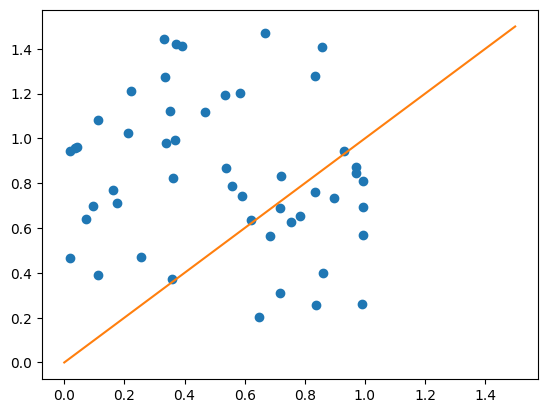

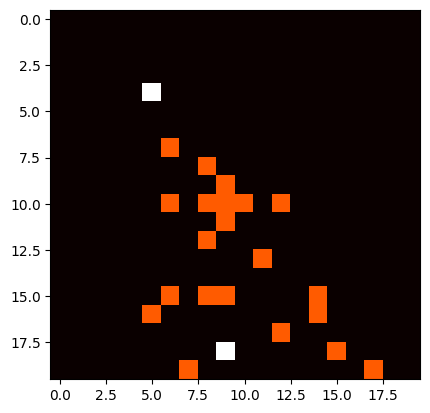

In [12]:
# Example 4: Making persistence images with the default settings
# Default settings are a linear weighting function over the interval [0, max_persistence], resolution=25, sigma=1/2*(pixel height), and hard boundaries.

HKs = [[np.vstack((np.random.rand(50), np.random.rand(50) * 2/3 + np.random.rand(50))).T for _ in range(5)] for _ in range(10)]
PIs = make_PIs(HKs, res, sig)

# Plot a persistence diagram and its persistence image
HK1 = HKs[0][0]
plt.figure()
plt.plot(HK1[:,0], HK1[:,1], 'o')
plt.plot([0,1.5],[0,1.5])  # plot the diagonal line
plt.show()

plt.figure()
plt.imshow(PIs[0][0], cmap='hot', interpolation='nearest')
plt.show()